# Notebook #4: Estandarización

In [14]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_scaling as ss


- Importamos el dataframe generado en el notebook anterior y lo comprobamos, así como sus columnas y tipos de datos.

In [15]:
df = pd.read_csv("../../datos/modelo3/csv_sin_outliers.csv", index_col=0)
df.head(3)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,697.554348,60.0,1,682.516667,694.538217,705.633136,7037,697.957447,1
1,750.0,697.554348,70.0,1,697.968750,694.538217,735.546086,16145,678.344828,0
3,590.0,697.554348,70.0,1,705.230769,677.594595,641.457386,56596,670.111111,0


- Aplicaremos los escaladores a las columnas numéricas size y distance, y los graficaremos.

In [16]:
df_escaladores_graf = ss.aplicar_escaladores(df, ["size", "distance"], [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [17]:
df_escaladores_graf.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift', 'size_robust',
       'distance_robust', 'size_minmax', 'distance_minmax', 'size_standard',
       'distance_standard', 'size_normalizer', 'distance_normalizer'],
      dtype='object')

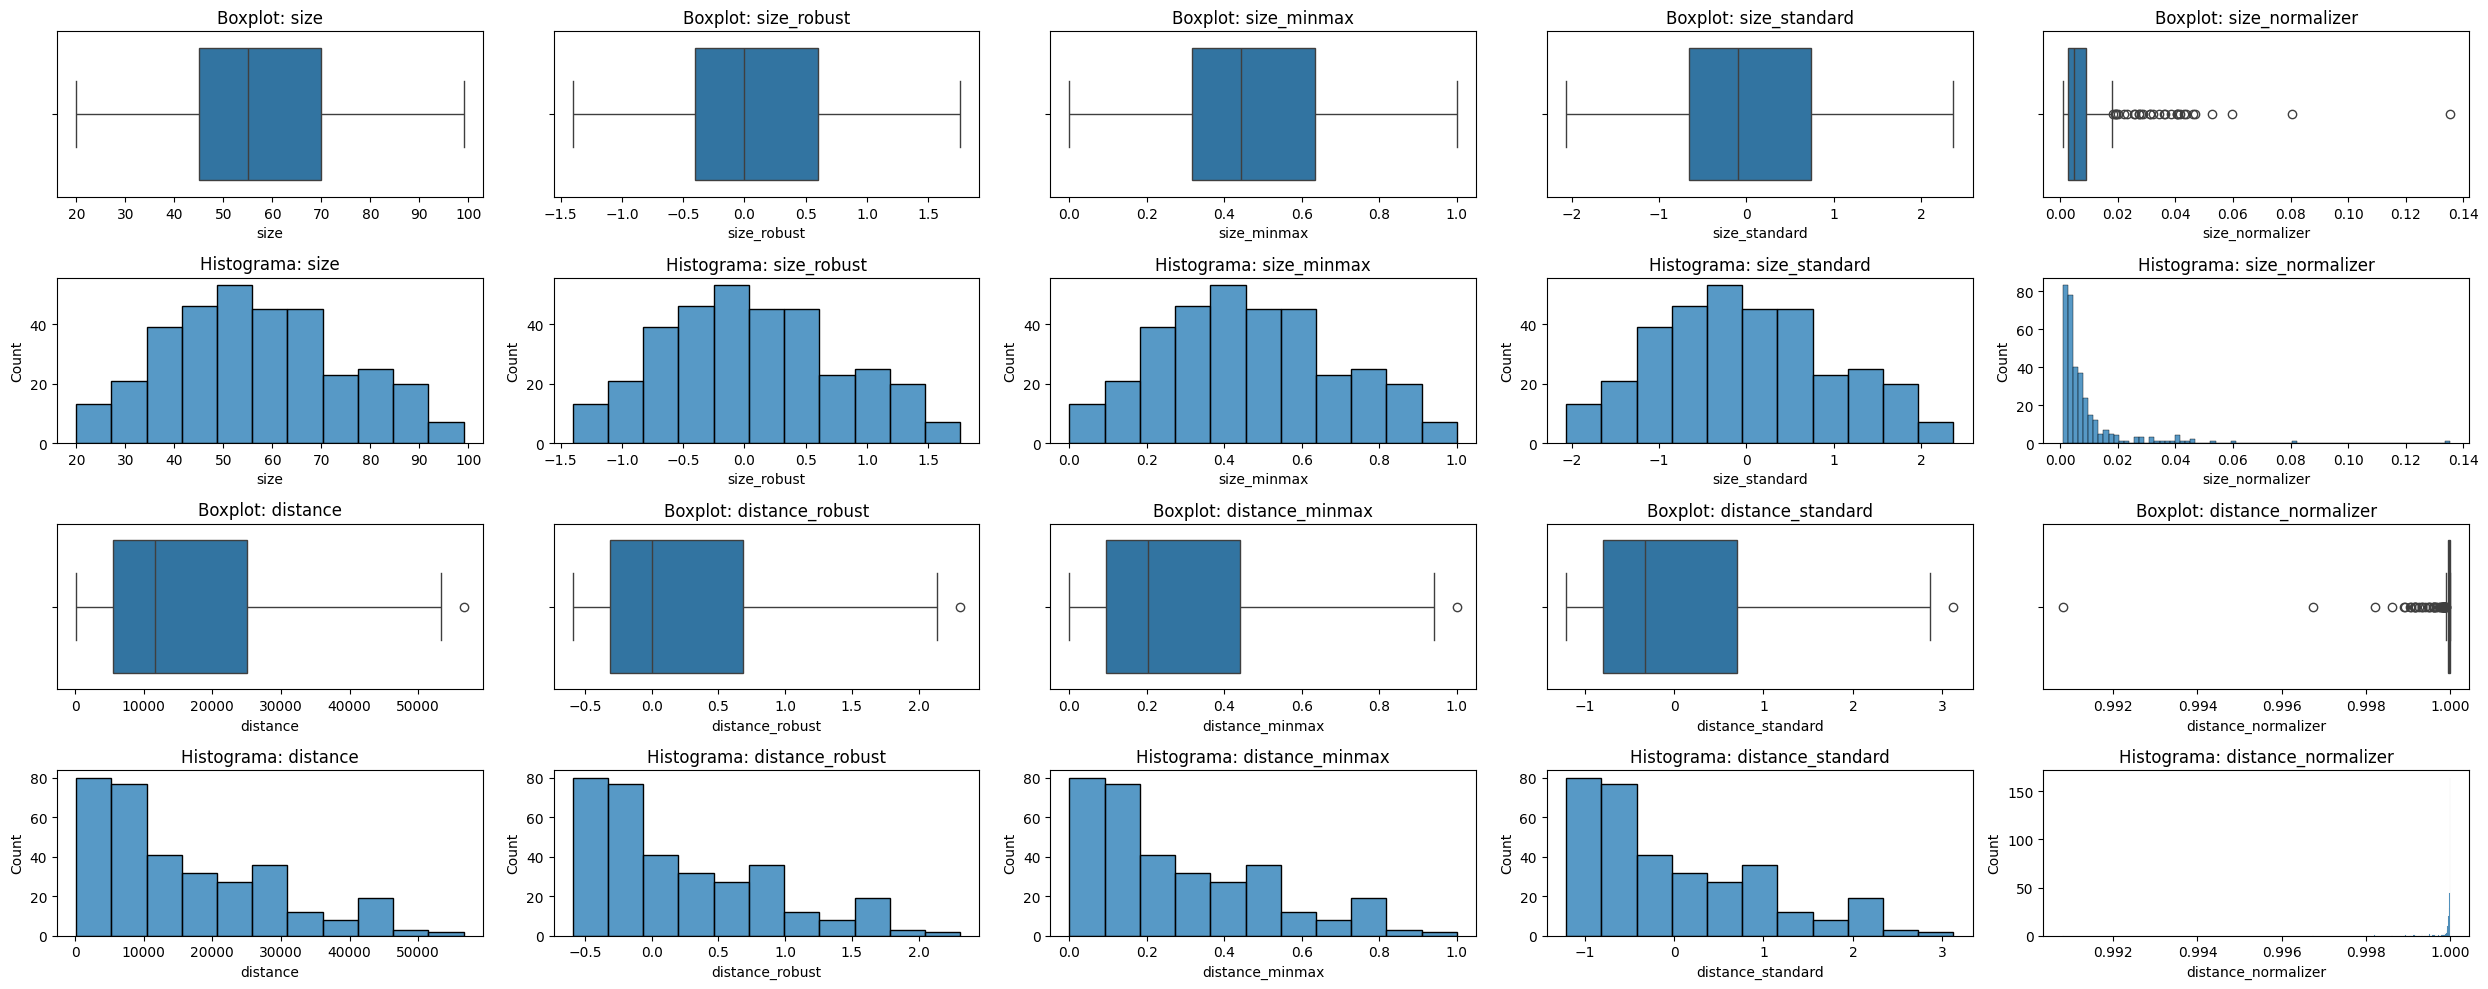

In [18]:
ss.graficar_escaladores(df_escaladores_graf, ["size", "distance"], ['size_robust',
       'distance_robust', 'size_minmax', 'distance_minmax', 'size_standard',
       'distance_standard', 'size_normalizer', 'distance_normalizer'])

- Nos quedaremos con el StandardScaler, dado que, en las gráficas no se observan grandes diferencias y, lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [19]:
df.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift'],
      dtype='object')

In [20]:
df_standard = ss.aplicar_escaladores(df, ['propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift'], [StandardScaler()])
df_standard.head(1)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_standard,size_standard,exterior_standard,rooms_standard,bathrooms_standard,municipality_standard,distance_standard,floor_standard,hasLift_standard
0,750.0,697.554348,60.0,1,682.516667,694.538217,705.633136,7037,697.957447,1,0.284395,0.180254,0.474821,-1.202327,0.301023,0.312736,-0.680228,0.345491,0.940663


- Eliminamos las columnas originales.

In [21]:
df_standard.drop(columns = ['propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift'], inplace=True)
df_standard.head(1)

,price,propertyType_standard,size_standard,exterior_standard,rooms_standard,bathrooms_standard,municipality_standard,distance_standard,floor_standard,hasLift_standard
0,750.0,0.284395,0.180254,0.474821,-1.202327,0.301023,0.312736,-0.680228,0.345491,0.940663


- Guardamos el DF con el que finaliza el preprocesamiento, estando preparado para realizar predicciones en el Notebook #5.

In [22]:
df_standard.to_csv("../../datos/modelo3/csv_estandarizado.csv")